<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/Kernel_PCA_on_Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kernel Principle Component Analysis**

#Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataSet = pd.read_csv('Wine.csv')

In [3]:
dataSet

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
# Problem Statemen is to predict whether the asset is purchased or not

In [5]:
x = dataSet.iloc[:,:-1].values
y = dataSet.iloc[:, -1].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 7)

#Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train.shape)

(142, 13)


#Applying Kernel PCA to reduce the number of dimensions so that we can use multiple features to extract two new features (Principle Components) so that we can make new predictions on dataset withmore than 2 features but here key takeaway is that we are using Kernel having a non-linear nature to create a more robust pair of principle component features

In [10]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components = 2, kernel = 'rbf')
# traditionally 2 components are useful for visualisation and training the model
# as we don't want to get into overfitting issues

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [11]:
print(x_train.shape)

(142, 2)


#Fitting the model on our data set

In [12]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state=0)

In [13]:
RFModel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [14]:
RFModel.score(x_train, y_train)

1.0

In [15]:
RFModel.score(x_test, y_test)

0.9444444444444444

#Predicting on test data set

In [16]:
y_pred = RFModel.predict(x_test)

In [17]:
y_pred

array([3, 1, 3, 3, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2,
       2, 2, 1, 3, 2, 3, 3, 2, 2, 1, 3, 2, 2, 2])

In [18]:
y_test

array([3, 1, 3, 3, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2])

In [19]:
# to compare the predicted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [1 1]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [2 3]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]]


#Confusion Matrix

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7  0  0]
 [ 1 16  0]
 [ 0  1 11]]


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9444444444444444

In [22]:
# we get accuracy of almost 80% 

In [23]:
import seaborn as sns

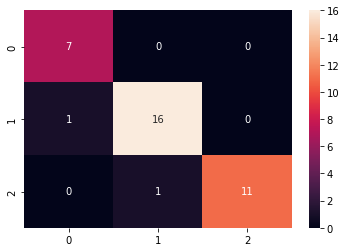

In [24]:
sns.heatmap(cm, annot=True)

#Visualisation of training dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


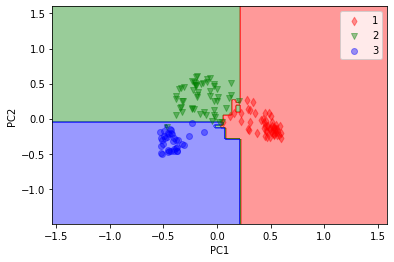

In [25]:
from matplotlib.colors import ListedColormap

markers = ('d', 'v',"o")
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_train))])

    # plot the decision surface
x1_min, x1_max = x_train[:, 0].min() - 1,  x_train[:, 0].max() + 1    
x2_min, x2_max =  x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z = RFModel.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=x_train[y_train == cl, 0], y=x_train[y_train == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)
    

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

#Visualisation of testing dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


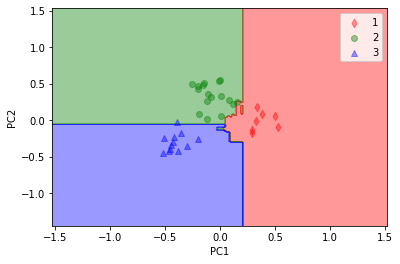

In [26]:
from matplotlib.colors import ListedColormap

markers = ('d', 'o', '^', 'v')
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
x1_min, x1_max = x_test[:, 0].min() - 1,  x_test[:, 0].max() + 1    
x2_min, x2_max =  x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z =RFModel.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test[y_test == cl, 0], y=x_test[y_test == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)
    

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

#**Working on breast cancer dataset**

###Importing Dataset

In [27]:
dataSet = pd.read_csv('data.csv')
dataSet

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [28]:
x = dataSet.iloc[:,2:14].values
y = dataSet.iloc[:, 1].values

In [29]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [30]:
x

array([[1.80e+01, 1.04e+01, 1.23e+02, ..., 7.87e-02, 1.09e+00, 9.05e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, ..., 5.67e-02, 5.43e-01, 7.34e-01],
       [1.97e+01, 2.12e+01, 1.30e+02, ..., 6.00e-02, 7.46e-01, 7.87e-01],
       ...,
       [1.66e+01, 2.81e+01, 1.08e+02, ..., 5.65e-02, 4.56e-01, 1.07e+00],
       [2.06e+01, 2.93e+01, 1.40e+02, ..., 7.02e-02, 7.26e-01, 1.59e+00],
       [7.76e+00, 2.45e+01, 4.79e+01, ..., 5.88e-02, 3.86e-01, 1.43e+00]])

###Splitting the dataset

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 77)

In [32]:
x_train.shape

(455, 12)

###Feature Scaling

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train)

[[-0.49 -0.99 -0.56 ... -0.71 -1.03 -1.  ]
 [ 1.13  0.15  1.1  ... -0.72  0.11 -0.82]
 [ 0.1   1.89  0.17 ...  1.1  -0.15 -0.35]
 ...
 [ 0.86  1.4   0.81 ... -1.18  0.33  0.81]
 [-0.65 -0.43 -0.68 ... -0.76 -0.72  0.02]
 [-0.05  0.44 -0.11 ... -0.6  -0.54  0.49]]


#KernelPCA

In [34]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [35]:
x_train.shape
# we can observe that shape of dataset is reduced i.e we are having 2 features instead of 12 due to PCA

(455, 2)


###Training the model

In [36]:
RFModel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=0)
RFModel.fit(x_train, y_train)
RFModel.score(x_train, y_train)


0.9846153846153847

In [37]:
RFModel.score(x_test, y_test)


0.9210526315789473

###Confusion Matrix

In [38]:
y_pred = RFModel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  3]
 [ 6 33]]


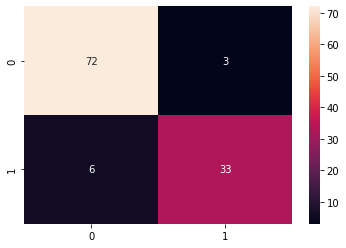

In [39]:
sns.heatmap(cm, annot=True)

###Visualisation of the data

In [40]:
# to compare the prediceted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'M']
 ['B' 'B']
 ['B' 'M']
 ['B' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'M']
 ['M' 'M']
 ['B' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']